# Programming Exercise 6: Support Vector Machines

> In this exercise, you will be using support vector machines (SVMs) to build a spam classifier.

## 1. Support Vector Machines

### 1.1 Example Dataset 1

> We will begin by with a 2D example dataset which can be separated by a linear boundary.

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat = scipy.io.loadmat('data/ex6data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

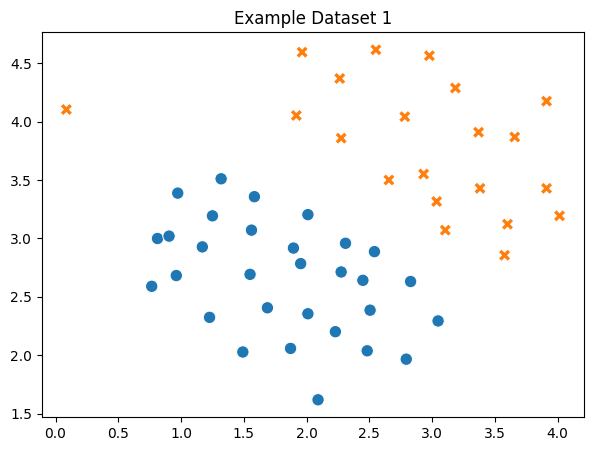

In [5]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x=mat['X'][:,0], y=mat['X'][:,1], hue=mat['y'].ravel(), style=mat['y'].ravel(), s=80, legend=False)
plt.title('Example Dataset 1')
plt.show(ax)

#### Decision Boundary

In [6]:
def plot_boundary(X, y, model, title):
    # Plot the data points with different colors and styles for each class
    ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, s=80, legend=False)
    ax.set(title=title)

    # Get the current axis to set limits and draw the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model over
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Evaluate the decision function for each point in the grid
    Z = model.decision_function(xy).reshape(XX.shape)

    # Draw the decision boundary (level 0) with a dashed green line
    ax.contour(XX, YY, Z, colors='g', levels=[0], linestyles=['--'])


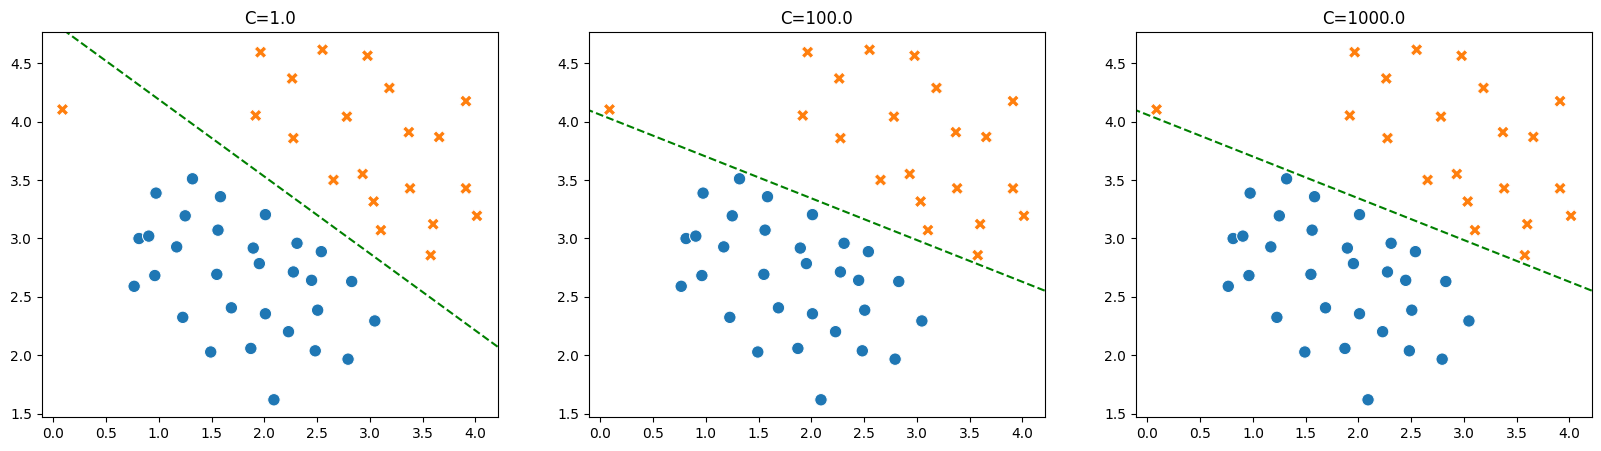

In [7]:
from sklearn import svm

# Define a list of C values for SVM regularization
c_vals = [1.0, 100.0, 1000.0]

# Create a figure to contain subplots for each value of C
plt.figure(figsize=(20,5))

# Loop through each C value
for i, c in enumerate(c_vals):
    # Initialize an SVM classifier with a linear kernel and the current C value
    clf = svm.SVC(kernel='linear', C=c)
    
    # Fit the classifier on the data
    clf.fit(mat['X'], mat['y'].ravel())
    
    # Create a subplot for the current value of C
    plt.subplot(1,3,i+1)
    
    # Plot the decision boundary for the current classifier
    plot_boundary(mat['X'], mat['y'].ravel(), clf, 'C={}'.format(c))
    
# Show the plot with all subplots
plt.show()


### 1.2 SVM with Gaussian Kernels

Gaussian kernel:

$$ K_{gaussian}(x^{(i)}, x^{(j)}) = exp\bigg(-\frac{||x^{(i)}-x^{(j)} ||^2 }{2\sigma^2}\bigg) = exp\Bigg(-\frac{\sum_{k=1}^n(x_k^{(i)}-x_k^{(j)})^2}{2\sigma^2}\Bigg)$$

In [8]:
def gaussian_kernel(x1, x2, sigma=0.1):
    # Flatten x1 and x2 to ensure they are 1-dimensional
    x1 = x1.ravel()
    x2 = x2.ravel()
    
    # Compute the squared difference between x1 and x2
    sumx1x2 = np.sum((x1 - x2) ** 2)
    
    # Compute the Gaussian kernel
    # exp(-||x1 - x2||^2 / (2 * sigma^2))
    return np.exp(-sumx1x2 / (2 * sigma ** 2))


In [9]:
import numpy as np

def gaussian_kernel(x1, x2, sigma=0.1):
    # Flatten x1 and x2 to ensure they are 1-dimensional
    x1 = x1.ravel()
    x2 = x2.ravel()
    
    # Compute the squared difference between x1 and x2
    sumx1x2 = np.sum((x1 - x2) ** 2)
    
    # Compute the Gaussian kernel
    # exp(-||x1 - x2||^2 / (2 * sigma^2))
    return np.exp(-sumx1x2 / (2 * sigma ** 2))

# Define the input vectors
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

# Compute the Gaussian kernel
gk = gaussian_kernel(x1, x2, sigma)

# Print the result
print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {0} : {1}\n\t(for sigma = 2, this value should be about 0.324652)\n'.format(sigma, gk))


Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 : 0.32465246735834974
	(for sigma = 2, this value should be about 0.324652)



#### 1.2.2 Example Dataset 2

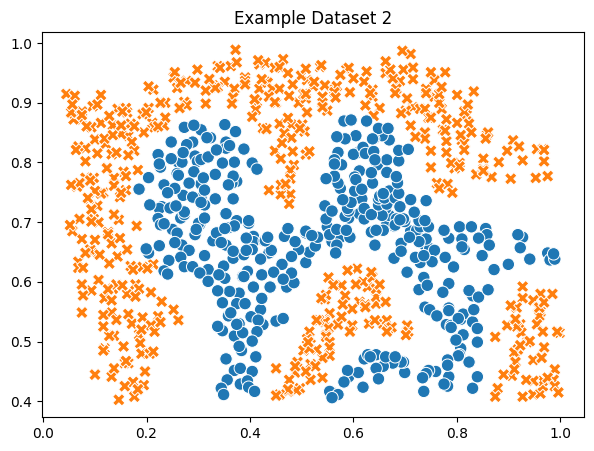

In [10]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the .mat file
mat = scipy.io.loadmat('data/ex6data2.mat')

# Create a new figure for the plot
plt.figure(figsize=(7, 5))

# Plot the data using seaborn's scatterplot function
# X[:,0] and X[:,1] are the coordinates of the points
# y.ravel() contains the labels for each point
ax = sns.scatterplot(x=mat['X'][:, 0], y=mat['X'][:, 1], 
                     hue=mat['y'].ravel(), style=mat['y'].ravel(), 
                     s=80, legend=False)

# Set the title of the plot
plt.title('Example Dataset 2')

# Show the plot
plt.show()


In [11]:
import numpy as np

def gaussian_kernel(x1, x2, sigma=0.1):
    """
    Computes the Gaussian kernel (RBF) between two vectors.

    Parameters:
    x1 (numpy array): First input vector.
    x2 (numpy array): Second input vector.
    sigma (float): Parameter for the Gaussian kernel.

    Returns:
    float: The computed Gaussian kernel.
    """
    x1 = x1.ravel()  # Flatten the array to 1D
    x2 = x2.ravel()  # Flatten the array to 1D
    sumx1x2 = np.sum((x1 - x2) ** 2)  # Compute the squared difference
    return np.exp(-sumx1x2 / (2 * sigma ** 2))  # Apply the Gaussian kernel formula

def gaussian_kernel_matrix(X1, X2, sigma=0.1):
    """
    Computes the Gaussian kernel matrix between two datasets.

    Parameters:
    X1 (numpy array): First input dataset of shape (m1, n).
    X2 (numpy array): Second input dataset of shape (m2, n).
    sigma (float): Parameter for the Gaussian kernel.

    Returns:
    numpy array: The computed Gaussian kernel matrix of shape (m1, m2).
    """
    # Initialize the Gram matrix with zeros
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))

    # Compute the Gaussian kernel for each pair of points (x1, x2)
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = gaussian_kernel(x1, x2, sigma)

    return gram_matrix


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

def gaussian_kernel(x1, x2, sigma=0.1):
    """
    Computes the Gaussian kernel (RBF) between two vectors.
    Parameters:
    x1 (numpy array): First input vector.
    x2 (numpy array): Second input vector.
    sigma (float): Parameter for the Gaussian kernel.
    Returns:
    float: The computed Gaussian kernel.
    """
    x1 = x1.ravel()  # Flatten the array to 1D
    x2 = x2.ravel()  # Flatten the array to 1D
    sumx1x2 = np.sum((x1 - x2) ** 2)  # Compute the squared difference
    return np.exp(-sumx1x2 / (2 * sigma ** 2))  # Apply the Gaussian kernel formula

def gaussian_kernel_matrix(X1, X2, sigma=0.1):
    """
    Computes the Gaussian kernel matrix between two datasets.
    Parameters:
    X1 (numpy array): First input dataset of shape (m1, n).
    X2 (numpy array): Second input dataset of shape (m2, n).
    sigma (float): Parameter for the Gaussian kernel.
    Returns:
    numpy array: The computed Gaussian kernel matrix of shape (m1, m2).
    """
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = gaussian_kernel(x1, x2, sigma)
    return gram_matrix

def plot_gaussian_boundary(X, y, model, title='SVM Decision Boundary for Gaussian Kernel'):
    """
    Plots the decision boundary for an SVM model with a Gaussian kernel.
    Parameters:
    X (numpy array): Input feature matrix.
    y (numpy array): Input labels.
    model (sklearn.svm.SVC): Trained SVM model.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(7,5))  # Set the figure size
    ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, s=80, legend=False)  # Plot the data points
    ax.set(title=title)  # Set the title of the plot
    ax = plt.gca()
    xlim = ax.get_xlim()  # Get x-axis limits
    ylim = ax.get_ylim()  # Get y-axis limits

    # Create a grid to evaluate the model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Compute the Gaussian kernel matrix for the grid
    gram = gaussian_kernel_matrix(xy, X)
    Z = model.predict(gram).reshape(XX.shape)  # Predict the labels for the grid points

    # Plot the decision boundary
    ax.contour(XX, YY, Z, colors='g', levels=[0.5], linestyles=['--'])
    plt.show()  # Display the plot


In [13]:
# Create an SVM classifier with a precomputed kernel and set regularization parameter C
clf = svm.SVC(kernel="precomputed", C=1.0, verbose=True)

# Compute the Gaussian kernel matrix for the training data
gram = gaussian_kernel_matrix(mat['X'], mat['X'], sigma=0.1)

# Fit the SVM model using the precomputed Gaussian kernel matrix and the training labels
clf.fit(gram, mat['y'].ravel())


[LibSVM]*
optimization finished, #iter = 249
obj = -116.611531, rho = 0.403537
nSV = 185, nBSV = 161
Total nSV = 185


SVC(kernel='precomputed', verbose=True)

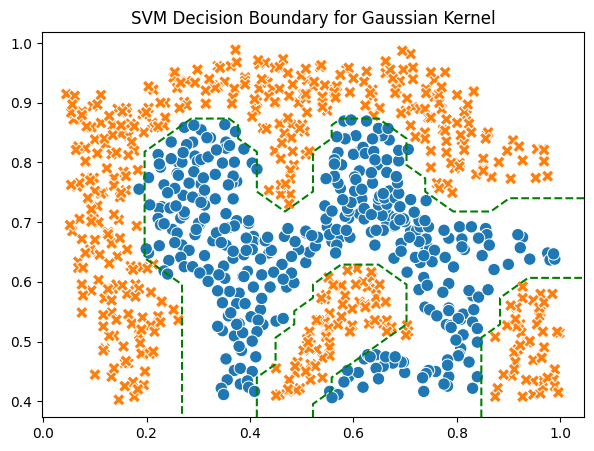

In [14]:
plot_gaussian_boundary(mat['X'], mat['y'].ravel(), clf)

#### 1.2.3 Example Dataset 3

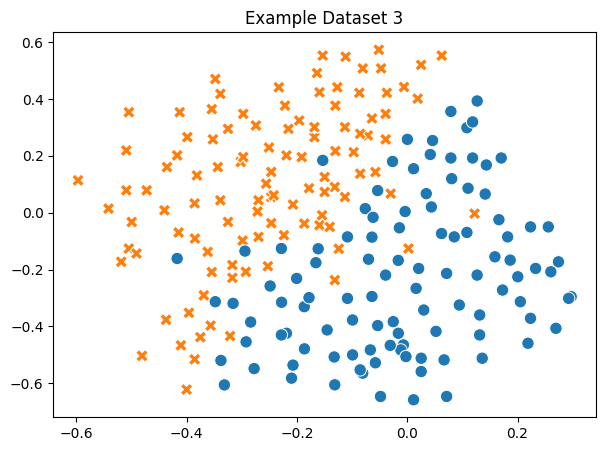

In [15]:
# Load the dataset from the provided .mat file
mat = scipy.io.loadmat('data/ex6data3.mat')

# Create a scatter plot of the dataset
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x=mat['X'][:,0], y=mat['X'][:,1], hue=mat['y'].ravel(), style=mat['y'].ravel(), s=80, legend=False)
plt.title('Example Dataset 3')
plt.show(ax)


#### Best parameters $C$ and $\sigma$

In [16]:
# Function to find the best values of C and sigma for the Gaussian kernel SVM
def find_best_c_sigma(X, y, Xval, yval):
    # Define candidate values for C and sigma
    C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    
    # Initialize variables to store the best C, sigma, and error
    best_C = 0.01
    best_sigma = 0.01
    error = 9999
    
    # Loop over all combinations of C and sigma
    for c in C_vals:
        for s in sigma_vals:
            # Train SVM with Gaussian kernel using precomputed kernel matrix
            clf = svm.SVC(kernel="precomputed", C=c)
            gram = gaussian_kernel_matrix(X, X, sigma=s)
            clf.fit(gram, y)

            # Predict on validation set
            gram_pred = gaussian_kernel_matrix(Xval, X, sigma=s)
            y_pred = clf.predict(gram_pred)
            
            # Compute mean error
            error_mean = np.mean(y_pred != yval)
            
            # Update best values if error is lower
            if error_mean < error:
                best_C = c
                best_sigma = s
                error = error_mean
    
    return best_C, best_sigma


In [17]:
C, sigma = find_best_c_sigma(mat['X'], mat['y'].ravel(), mat['Xval'], mat['yval'].ravel())

In [18]:
# Train SVM with Gaussian kernel using precomputed kernel matrix
clf = svm.SVC(kernel="precomputed", C=C)
gram = gaussian_kernel_matrix(mat['X'], mat['X'], sigma=sigma)
clf.fit(gram, mat['y'].ravel())


SVC(C=1, kernel='precomputed')

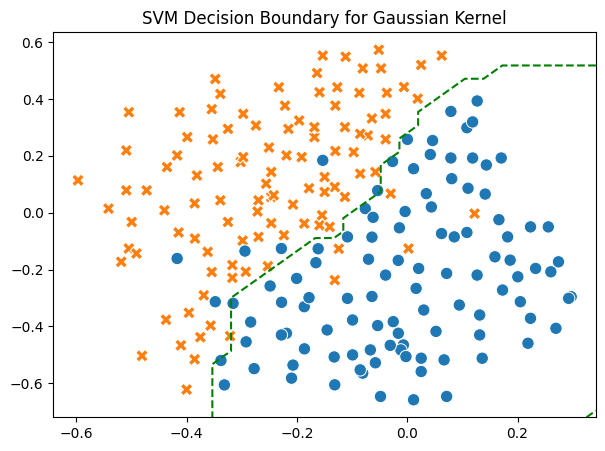

In [19]:
plot_gaussian_boundary(mat['X'], mat['y'].ravel(), clf)

## 2. Spam Classification

> Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.
You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0).

To train the spam filter, you'll first need to preprocess the emails to extract features. These features could include things like the frequency of certain words, presence of specific phrases, or other relevant characteristics.

After preprocessing, you can represent each email as a feature vector. Then, you'll use these feature vectors along with their corresponding labels (spam or non-spam) to train an SVM classifier.

Once the classifier is trained, you can use it to predict whether new emails are spam or not by feeding their feature vectors into the trained model.

### 2.1 Preprocessing Emails

In [20]:
f = open('data/emailSample1.txt', 'r')
contents = f.read()
print(contents)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




#### Preprocessing steps:

* Lower case
* Strip all HTML: Looks for any expression that starts with < and ends with > and replace with a space
* Handle numbers: Replace numbers with the text 'number'
* Handle URLS: Replace URLs with the text 'httpaddr'
* Handle Email Addresses: Replace email addresses with the text 'emailaddr'
* Handle Dollars $: Replace \$ with the text 'dollar'
* Remove non-words: Remove non alphanumeric characters and punctuation
* Word stemming

In [ ]:
# !pip install nltk

In [24]:
import re
import string
from nltk.stem import PorterStemmer

def process_email(email_contents):
    processed = email_contents.lower()
    processed = re.sub('<[^<>]+>', ' ', processed)
    processed = re.sub('[0-9]+', 'number', processed)
    processed = re.sub('(http|https)://[^\s]*', 'httpaddr', processed)
    processed = re.sub('[^\s]+@[^\s]+', 'emailaddr', processed)
    processed = re.sub('[$]+', 'dollar', processed)
    
    for punctuation in string.punctuation:
        processed = processed.replace(punctuation, ' ')
        
    stemmer = PorterStemmer()
    processed = ' '.join([stemmer.stem(re.sub('[^a-zA-Z0-9]', '', word)) for word in processed.split()])
    processed = ' '.join(processed.split())    
    return processed.strip()

In [25]:
process_email(contents)

'anyon know how much it cost to host a web portal well it depend on how mani visitor you re expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr'

#### 2.1.1 Vocabulary List

In [26]:
df_vocab = pd.read_csv('data/vocab.txt', sep='\t', header=None)
df_vocab.columns = ['index', 'word']
df_vocab.sample(5)

,index,word
274,275,charact
16,17,act
789,790,host
31,32,advis
418,419,defens


In [27]:
# This function processes the given email text by:
# 1. Using the process_email function to remove non-essential elements such as HTML tags, URLs, email addresses, etc.
# 2. Printing the processed email for inspection.
# 3. Loading a vocabulary DataFrame from a file ('data/vocab.txt').
# 4. Extracting the indices of words in the processed email that exist in the vocabulary.
#    These indices represent the position of the words in the vocabulary, which will be used to create feature vectors.

def process_email_and_get_indices(text):
    # Process the email text
    text = process_email(text)
    
    # Print the processed email for inspection
    print('\n======= Processed Email =======\n', text, '\n========\n')
    
    # Load the vocabulary DataFrame from file
    df_vocab = pd.read_csv('data/vocab.txt', sep='\t', header=None)
    df_vocab.columns = ['index', 'word']
    
    # Extract the indices of words in the processed email that exist in the vocabulary
    indices = [df_vocab[df_vocab.word==word]['index'].values[0] for word in text.split() if len(df_vocab[df_vocab.word==word]['index'].values > 0)]
    
    return indices


In [28]:
word_indices = process_email_and_get_indices(contents)
print(word_indices)


======= Processed Email =======
 anyon know how much it cost to host a web portal well it depend on how mani visitor you re expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr 

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


### 2.2 Extracting Features from Emails

In [29]:
def email_features(indices):
    n = 1899
    x = np.zeros((n,1))
    x[indices]=1
    return x

In [31]:
features = email_features(word_indices)
features

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [32]:
print('Length of feature vector:', len(features))
print('Number of non-zero entries:', sum(features==1)[0])

Length of feature vector: 1899
Number of non-zero entries: 45


### 2.3 Training SVM for Spam Classification

In [33]:
data = scipy.io.loadmat('data/spamTrain.mat')
data_test = scipy.io.loadmat('data/spamTest.mat')

In [34]:
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(data['X'], data['y'].ravel())

SVC(C=0.1, kernel='linear')

In [35]:
print('Training Accuracy:', clf.score(data['X'], data['y'].ravel()))

Training Accuracy: 0.99825


In [36]:
print('Test Accuracy:', clf.score(data_test['Xtest'], data_test['ytest'].ravel()))

Test Accuracy: 0.989


### 2.4 Top Predictors for Spam

In [38]:
df_vocab['weights'] = clf.coef_[0,:]
df_vocab

,index,word,weights
0,1,aa,0.007932
1,2,ab,0.015633
2,3,abil,0.055465
3,4,abl,-0.013416
4,5,about,-0.066198
...,...,...,...
1894,1895,your,0.164941
1895,1896,yourself,0.117730
1896,1897,zdnet,-0.086706
1897,1898,zero,-0.006613


In [39]:
df_vocab.sort_values(by='weights', ascending=False).head(15)

,index,word,weights
1190,1191,our,0.500614
297,298,click,0.465916
1397,1398,remov,0.422869
738,739,guarante,0.383622
1795,1796,visit,0.367710
155,156,basenumb,0.345064
476,477,dollar,0.323632
1851,1852,will,0.269724
1298,1299,price,0.267298
1263,1264,pleas,0.261169


### Predicting on new email

In [40]:
# Open the file containing the email sample ('data/spamSample1.txt') in read mode
f = open('data/spamSample1.txt', 'r')

# Read the contents of the file
contents = f.read()

# Close the file
f.close()

# Process the email and extract word indices
word_indices = process_email_and_get_indices(contents)

# Create feature vector for the processed email using the extracted word indices
x = email_features(word_indices)

# Reshape the feature vector to match the shape expected by the classifier
x = x.reshape(1,-1)

# Use the trained classifier (clf) to predict whether the email is spam or not
y_pred = clf.predict(x)

# Print the spam classification result
print('Spam Classification:', y_pred[0])



======= Processed Email =======
 do you want to make dollarnumb or more per week if you are a motiv and qualifi individu i will person demonstr to you a system that will make you dollarnumb number per week or more thi is not mlm call our number hour pre record number to get the detail number number number i need peopl who want to make seriou money make the call and get the fact invest number minut in yourself now number number number look forward to your call and i will introduc you to peopl like yourself who are current make dollarnumb number plu per week number number number numberljgvnumb numberleannumberlrmsnumb numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb 

Spam Classification: 0


In [41]:
# Open the file containing the email sample ('data/spamSample2.txt') in read mode
f = open('data/spamSample2.txt', 'r')

# Read the contents of the file
contents = f.read()

# Close the file
f.close()

# Process the email and extract word indices
word_indices = process_email_and_get_indices(contents)

# Create feature vector for the processed email using the extracted word indices
x = email_features(word_indices)

# Reshape the feature vector to match the shape expected by the classifier
x = x.reshape(1,-1)

# Use the trained classifier (clf) to predict whether the email is spam or not
y_pred = clf.predict(x)

# Print the spam classification result
print('Spam Classification:', y_pred[0])



======= Processed Email =======
 best buy viagra gener onlin viagra numbermg x number pill dollarnumb free pill reorder discount top sell number qualiti satisfact guarante we accept visa master e check payment number satisfi custom httpaddr 

Spam Classification: 1


In [42]:
# Open the file containing the email sample ('data/emailSample1.txt') in read mode
f = open('data/emailSample1.txt', 'r')

# Read the contents of the file
contents = f.read()

# Close the file
f.close()

# Process the email and extract word indices
word_indices = process_email_and_get_indices(contents)

# Create feature vector for the processed email using the extracted word indices
x = email_features(word_indices)

# Reshape the feature vector to match the shape expected by the classifier
x = x.reshape(1,-1)

# Use the trained classifier (clf) to predict whether the email is spam or not
y_pred = clf.predict(x)

# Print the spam classification result
print('Spam Classification:', y_pred[0])



======= Processed Email =======
 anyon know how much it cost to host a web portal well it depend on how mani visitor you re expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr 

Spam Classification: 0


In [43]:
# Open the file containing the email sample ('data/emailSample2.txt') in read mode
f = open('data/emailSample2.txt', 'r')

# Read the contents of the file
contents = f.read()

# Close the file
f.close()

# Process the email and extract word indices
word_indices = process_email_and_get_indices(contents)

# Create feature vector for the processed email using the extracted word indices
x = email_features(word_indices)

# Reshape the feature vector to match the shape expected by the classifier
x = x.reshape(1,-1)

# Use the trained classifier (clf) to predict whether the email is spam or not
y_pred = clf.predict(x)

# Print the spam classification result
print('Spam Classification:', y_pred[0])



======= Processed Email =======
 folk my first time post have a bit of unix experi but am new to linux just got a new pc at home dell box with window xp ad a second hard disk for linux partit the disk and have instal suse number number from cd which went fine except it didn t pick up my monitor i have a dell brand enumberfpp number lcd flat panel monitor and a nvidia geforcenumb tinumb video card both of which are probabl too new to featur in suse s default set i download a driver from the nvidia websit and instal it use rpm then i ran saxnumb as wa recommend in some post i found on the net but it still doesn t featur my video card in the avail list what next anoth problem i have a dell brand keyboard and if i hit cap lock twice the whole machin crash in linux not window even the on off switch is inact leav me to reach for the power cabl instead if anyon can help me in ani way with these prob i d be realli grate i ve search the net but have run out of idea or should i be go for a diff